# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weather_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ust'-ilimsk
Processing Record 4 of Set 1 | callao
Processing Record 5 of Set 1 | sisimiut
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | santa vitoria do palmar
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | nelson bay
Processing Record 11 of Set 1 | dagua
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | umluj
Processing Record 15 of Set 1 | iranshahr
Processing Record 16 of Set 1 | ulsan
Processing Record 17 of Set 1 | arkalyk
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | smigiel
Processing Record 21 of Set 1 | savanna-la-mar
Processing Record 22 of Set 1 | utrik
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,28.94,74,75,3.09,NU,1712875454
1,waitangi,-43.9535,-176.5597,17.68,92,100,4.92,NZ,1712875427
2,ust'-ilimsk,58.0006,102.6619,-5.31,93,100,0.89,RU,1712875273
3,callao,-12.0667,-77.1500,24.16,69,0,6.17,PE,1712875454
4,sisimiut,66.9395,-53.6735,-5.27,90,96,1.36,GL,1712875454


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,28.94,74,75,3.09,NU,1712875454
1,waitangi,-43.9535,-176.5597,17.68,92,100,4.92,NZ,1712875427
2,ust'-ilimsk,58.0006,102.6619,-5.31,93,100,0.89,RU,1712875273
3,callao,-12.0667,-77.1500,24.16,69,0,6.17,PE,1712875454
4,sisimiut,66.9395,-53.6735,-5.27,90,96,1.36,GL,1712875454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

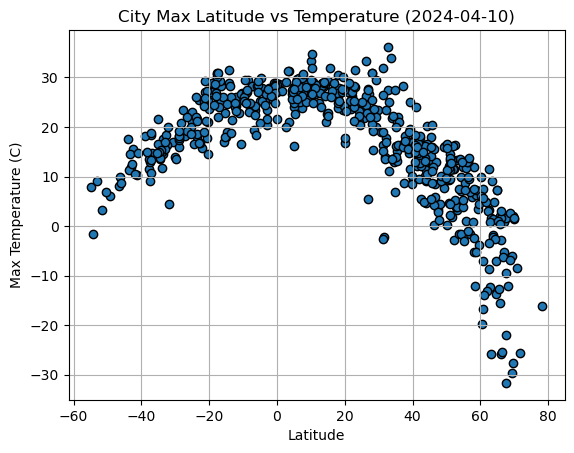

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2024-04-10)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

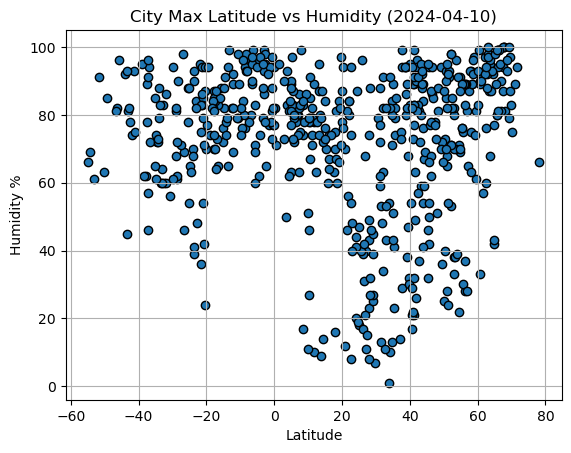

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Max Latitude vs Humidity (2024-04-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

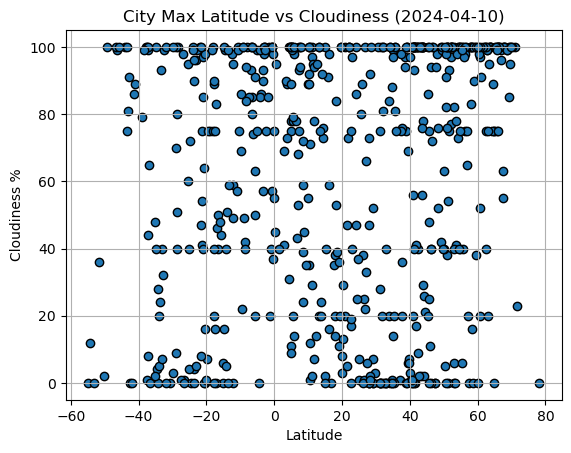

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Max Latitude vs Cloudiness (2024-04-10)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

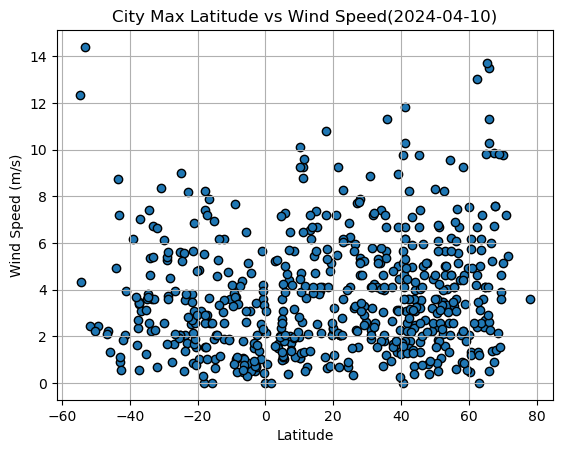

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs Wind Speed(2024-04-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ust'-ilimsk,58.0006,102.6619,-5.31,93,100,0.89,RU,1712875273
4,sisimiut,66.9395,-53.6735,-5.27,90,96,1.36,GL,1712875454
9,dagua,3.6569,-76.6886,31.28,93,89,1.66,CO,1712875454
10,albany,42.6001,-73.9662,15.05,81,100,1.79,US,1712875384
11,lompoc,34.6391,-120.4579,22.01,71,0,4.63,US,1712875455


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,28.94,74,75,3.09,NU,1712875454
1,waitangi,-43.9535,-176.5597,17.68,92,100,4.92,NZ,1712875427
3,callao,-12.0667,-77.1500,24.16,69,0,6.17,PE,1712875454
5,alice springs,-23.7000,133.8833,17.90,39,4,2.06,AU,1712875454
6,santa vitoria do palmar,-33.5189,-53.3681,17.62,60,93,3.60,BR,1712875454


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7075066803661993


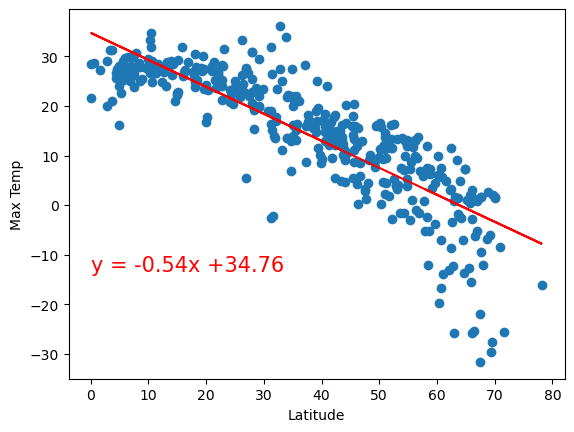

In [15]:
# Linear regression on Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(0, -10), ha='left', va='top' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.6583879820350033


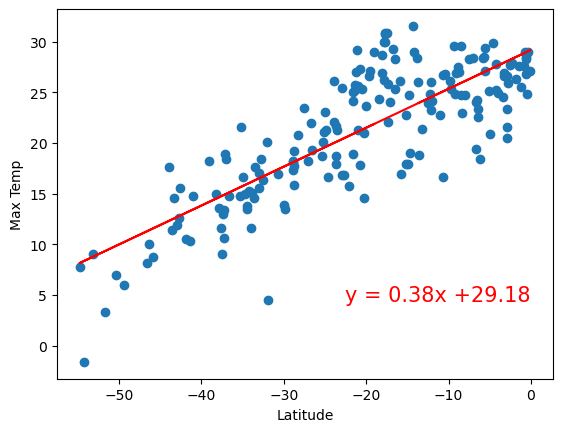

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red", xytext=(0,5), ha='right', va='center')

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

As the linear regression pictured in the above graphs indicates, in the Northern Hemisphere
Temperature and Latitude exhibit negative correlation; and in the Southern Hempisphere they exhibit positive correlation. This can be observed from the direction of the slope of the line for each graph, respectively. However, when observing the pattern of data points further conclusions can be drawn about the strength of these correlations. Temperature and Latitude in the Northern Hemisphere exhibit a stronger negative correlation than the positive correlation seen in the Southern Hemisphere, which can be seen from the way the data points cluster around the regression line and the amount of data points. The data points exhibited in the Southern Hemisphere scatter plot are not as closely clustered, but both graphs exhibit outliers.

It can be conlcuded that dropping Temperatures can be strongly linked to increasing Latitudes, which follows logically since regions further from the equator generally have lower temperatures. From our data frame snippet we can add further evidence to this conclusion, where Sisimuit in Greenland at Lat 67 degrees has a considerably low Max Temp than Kidal in Mali at Lay 18 degrees. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03062145614732392


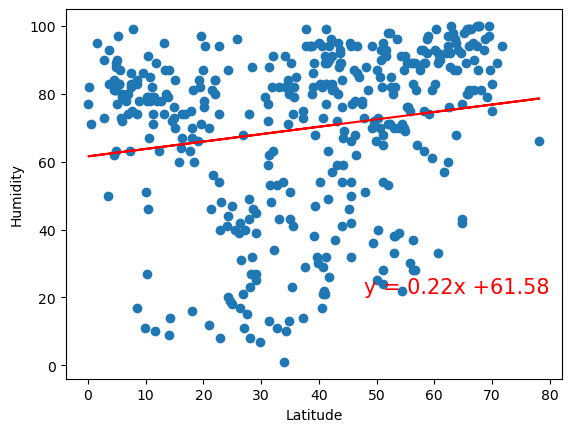

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(80,20), ha='right', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.07486398990263056


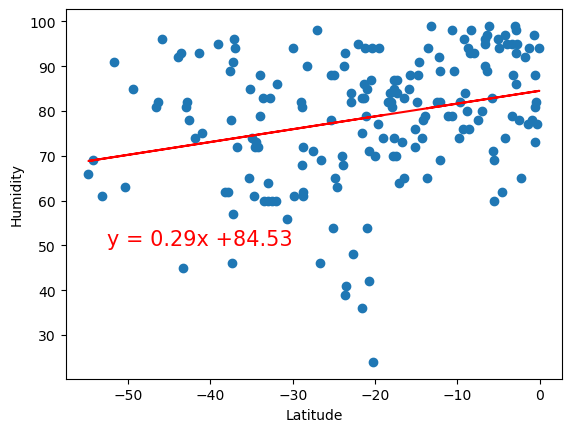

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red", xytext=(-30,50), ha='right')

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** The relationship between Humidity and Latitude in the Northern and Southern Hemisphere exhibits similar trends. It is firstly important to note that this data comparison is not a suitable candidate for linear regression, this can be concluded by the way the data points are distributed - very few actually fall close or on the line - and the slope of the line. In both examples, the linear relationship is weak - with changes in latitude having little impact on humidity levels in the regions under analysis. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0336664842872427


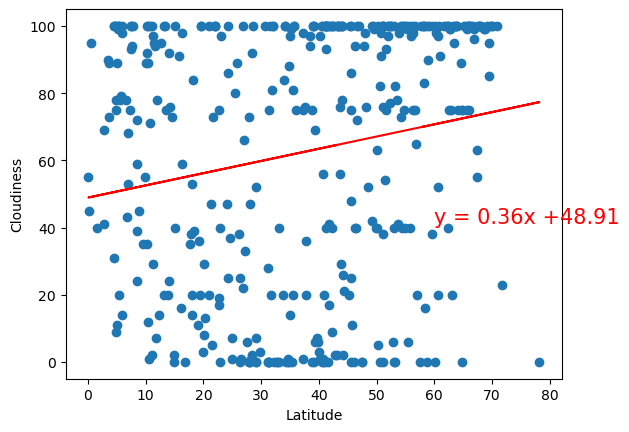

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(60,40), ha='left', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.053068251285497796


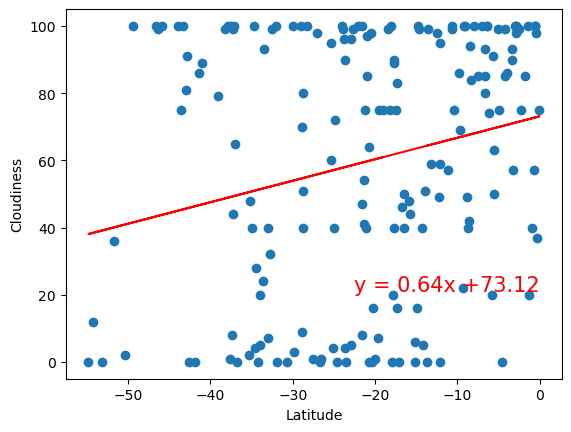

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red", xytext=(0,20), ha='right', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** Cloudiness and Latitude exhibit a non-linear or weak linear relationship
in both the Northern and Southern Hemisphere. In both contexts, the data points gather on top and bottom of the graph - signifying bimodal data. In the Northern Hemisphere linear regression, more dta points fall directly on the line. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014546418934569967


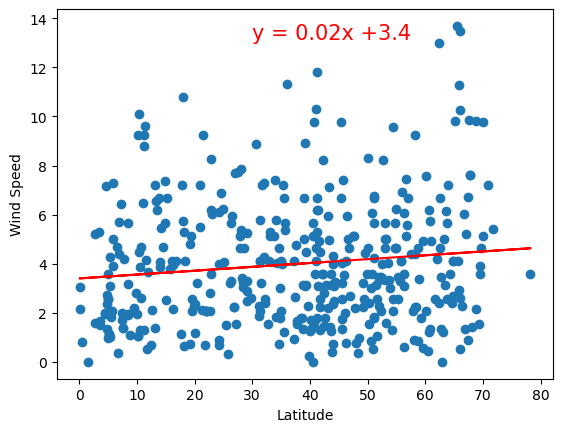

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(30,13), ha='left', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

Text(0, 0.5, 'Wind Speed')

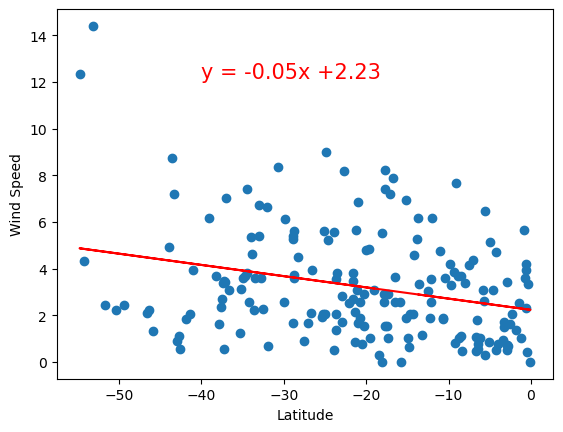

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,8), fontsize=15, color="red", xytext=(-40,12),ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** In this example again, the linear relationship between Latitude and Wind Speed in the Northern and Southern Hemisphere's respectfully represents a weak linear relationship. In the Southern Hemisphere a slight slope is exhibited, signifying that latitude has a minor impact on windseed - but the slope for the Northern Hemisphere is not notable. The linear model does capture the relationship more accurately in comparison to the southern Hemisphere, exhibited by the larger amount of data points falling on the line in the Northern Hemisphere example. Northern Hemisphere data has more outliers. 